In [1]:
%matplotlib inline
from pylab import *
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split 

train_data = scipy.io.loadmat('train_32x32.mat')


In [2]:
# extract the images (X) and labels (y) from the dict
#X = data input y = data output(label gambar)
X = train_data['X'] 
y = train_data['y'] 
#data = np.loadtxt('ex2data1.txt',delimiter=',')

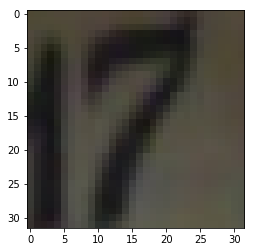

[7]


In [3]:
img_index = 80
plt.imshow(X[:,:,:,img_index])
plt.show()
print(y[img_index])

In [4]:
X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2],X.shape[3]).T
y = y.reshape(y.shape[0],)
X= X[:1000]
y= y[:1000]

y_coba = [y[80]]
x_coba = [X[80]]

X, y = shuffle(X, y, random_state=42)
print(x_coba)

[array([78, 72, 52, ..., 87, 87, 74], dtype=uint8)]


In [5]:
clf = RandomForestClassifier()
print(clf)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


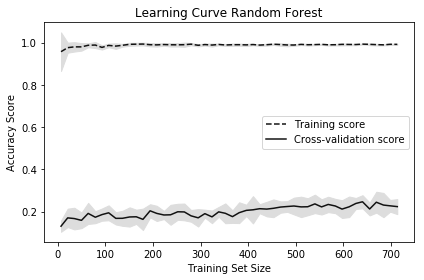

In [8]:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")


plt.title("Learning Curve Random Forest")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
predic = clf.predict(x_coba)
predic

array([7], dtype=uint8)

In [11]:
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

Accuracy: 0.19
             precision    recall  f1-score   support

          1       0.21      0.63      0.32        35
          2       0.14      0.10      0.12        29
          3       0.26      0.30      0.28        20
          4       0.18      0.13      0.15        23
          5       0.07      0.05      0.06        20
          6       0.50      0.10      0.16        21
          7       0.00      0.00      0.00        13
          8       0.17      0.08      0.11        12
          9       0.00      0.00      0.00        10
         10       0.00      0.00      0.00        17

avg / total       0.17      0.19      0.15       200



In [12]:
dt = tree.DecisionTreeClassifier()
print(dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [13]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
nb = GaussianNB()
nb.partial_fit(X_train, y_train, np.unique(y_train))

GaussianNB(priors=None)

In [15]:
#Gaussian Naive Bayes training plot
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


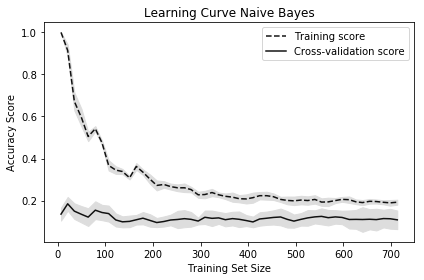

In [16]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")


plt.title("Learning Curve Naive Bayes")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [17]:
nbpred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test,nbpred))
print(confusion_matrix(y_test,nbpred))
print(classification_report(y_test,nbpred))

Accuracy: 0.16
[[10  6  5  2  0  2  1  2  2  5]
 [ 7  5  5  2  3  5  0  0  0  2]
 [ 4  2  3  2  2  1  2  4  0  0]
 [ 4  2  3  5  1  2  2  0  3  1]
 [ 3  1  1  1  5  1  1  3  0  4]
 [ 4  2  6  1  1  2  0  4  1  0]
 [ 3  2  2  0  0  2  1  1  1  1]
 [ 2  2  1  2  1  3  0  0  1  0]
 [ 2  0  1  2  2  0  1  2  0  0]
 [ 8  0  4  0  1  1  1  1  0  1]]
             precision    recall  f1-score   support

          1       0.21      0.29      0.24        35
          2       0.23      0.17      0.20        29
          3       0.10      0.15      0.12        20
          4       0.29      0.22      0.25        23
          5       0.31      0.25      0.28        20
          6       0.11      0.10      0.10        21
          7       0.11      0.08      0.09        13
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00        10
         10       0.07      0.06      0.06        17

avg / total       0.17      0.16      0.16       200



In [18]:
dtPreds = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test,dtPreds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

Accuracy: 0.16
[[22  2  5  4  1  0  0  0  0  1]
 [18  3  2  0  2  0  0  3  0  1]
 [ 8  3  6  1  0  0  1  0  0  1]
 [12  3  0  3  5  0  0  0  0  0]
 [10  3  3  0  1  1  0  0  1  1]
 [ 7  3  2  4  2  2  0  1  0  0]
 [ 9  1  1  1  0  1  0  0  0  0]
 [ 4  2  1  2  1  0  0  1  0  1]
 [ 7  0  1  0  1  0  1  0  0  0]
 [ 6  1  2  2  2  0  2  1  1  0]]
             precision    recall  f1-score   support

          1       0.21      0.63      0.32        35
          2       0.14      0.10      0.12        29
          3       0.26      0.30      0.28        20
          4       0.18      0.13      0.15        23
          5       0.07      0.05      0.06        20
          6       0.50      0.10      0.16        21
          7       0.00      0.00      0.00        13
          8       0.17      0.08      0.11        12
          9       0.00      0.00      0.00        10
         10       0.00      0.00      0.00        17

avg / total       0.17      0.19      0.15       200



In [19]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(tree.DecisionTreeClassifier(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


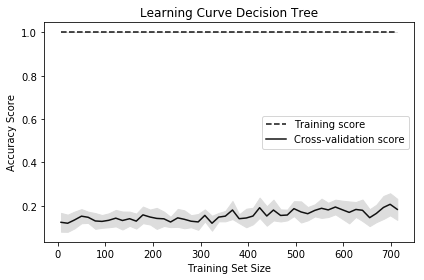

In [20]:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")


plt.title("Learning Curve Decision Tree")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()